In [1]:
import sys

sys.path.append("..")

from tools.tools import (
    get_ts_data_for_graph,
    load_sample,
)
from tools.display_tools import plot_current_state_of_graph
import pickle
import numpy as np
from IPython.display import HTML
from hydra import initialize, compose
import matplotlib.pyplot as plt
import matplotlib as mpl


ModuleNotFoundError: No module named 'statsmodels'

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset usage tutorial

In [3]:
# To keep everything clean we use hydra for HPs.
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='predict_single.yaml')

In [4]:
G = pickle.load(open("../" + cfg.full_graph_path, "rb"))

In [5]:
G_tr = pickle.load(open("../resources/rivers_bavaria.p", "rb"))

## Displaying graphs

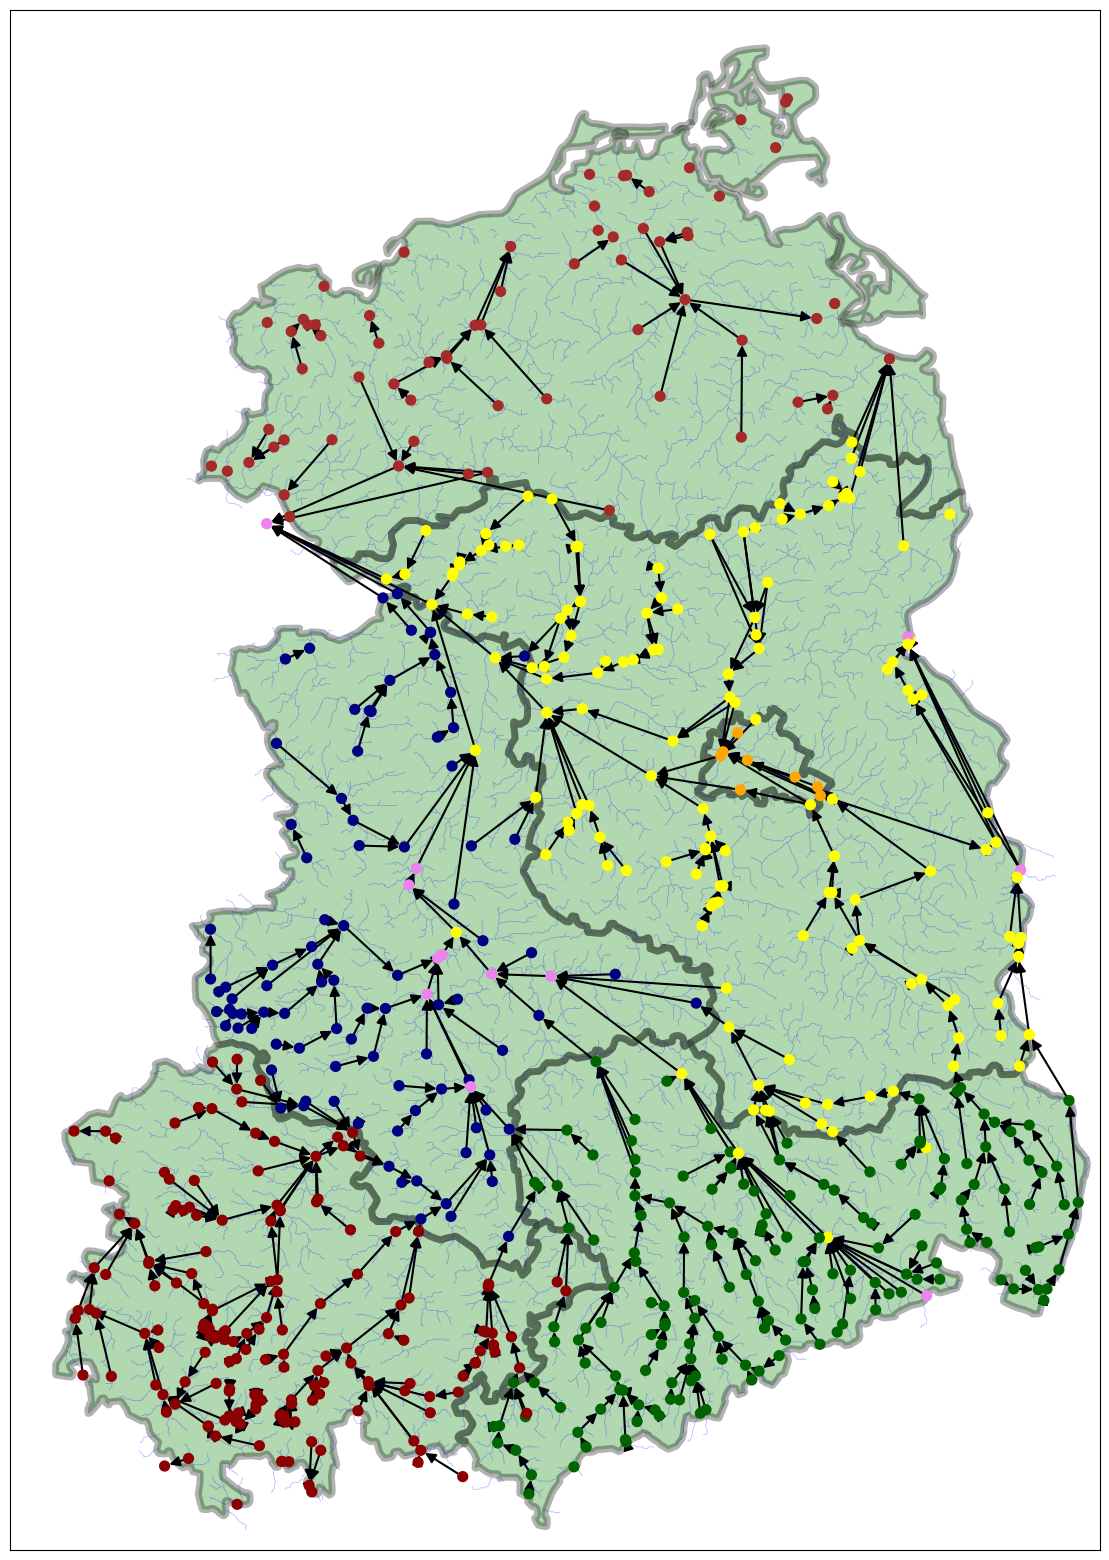

In [6]:
# Full Graph
plot_current_state_of_graph(
    G,
    dpi=300,
    node_size=50,
    save=0, #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15, 20),
    font_size=1,
    ger_path = "../visualization/east_german_map.shp",
    river_path = "../visualization/river_east_german_map.shp",
    title=""
)

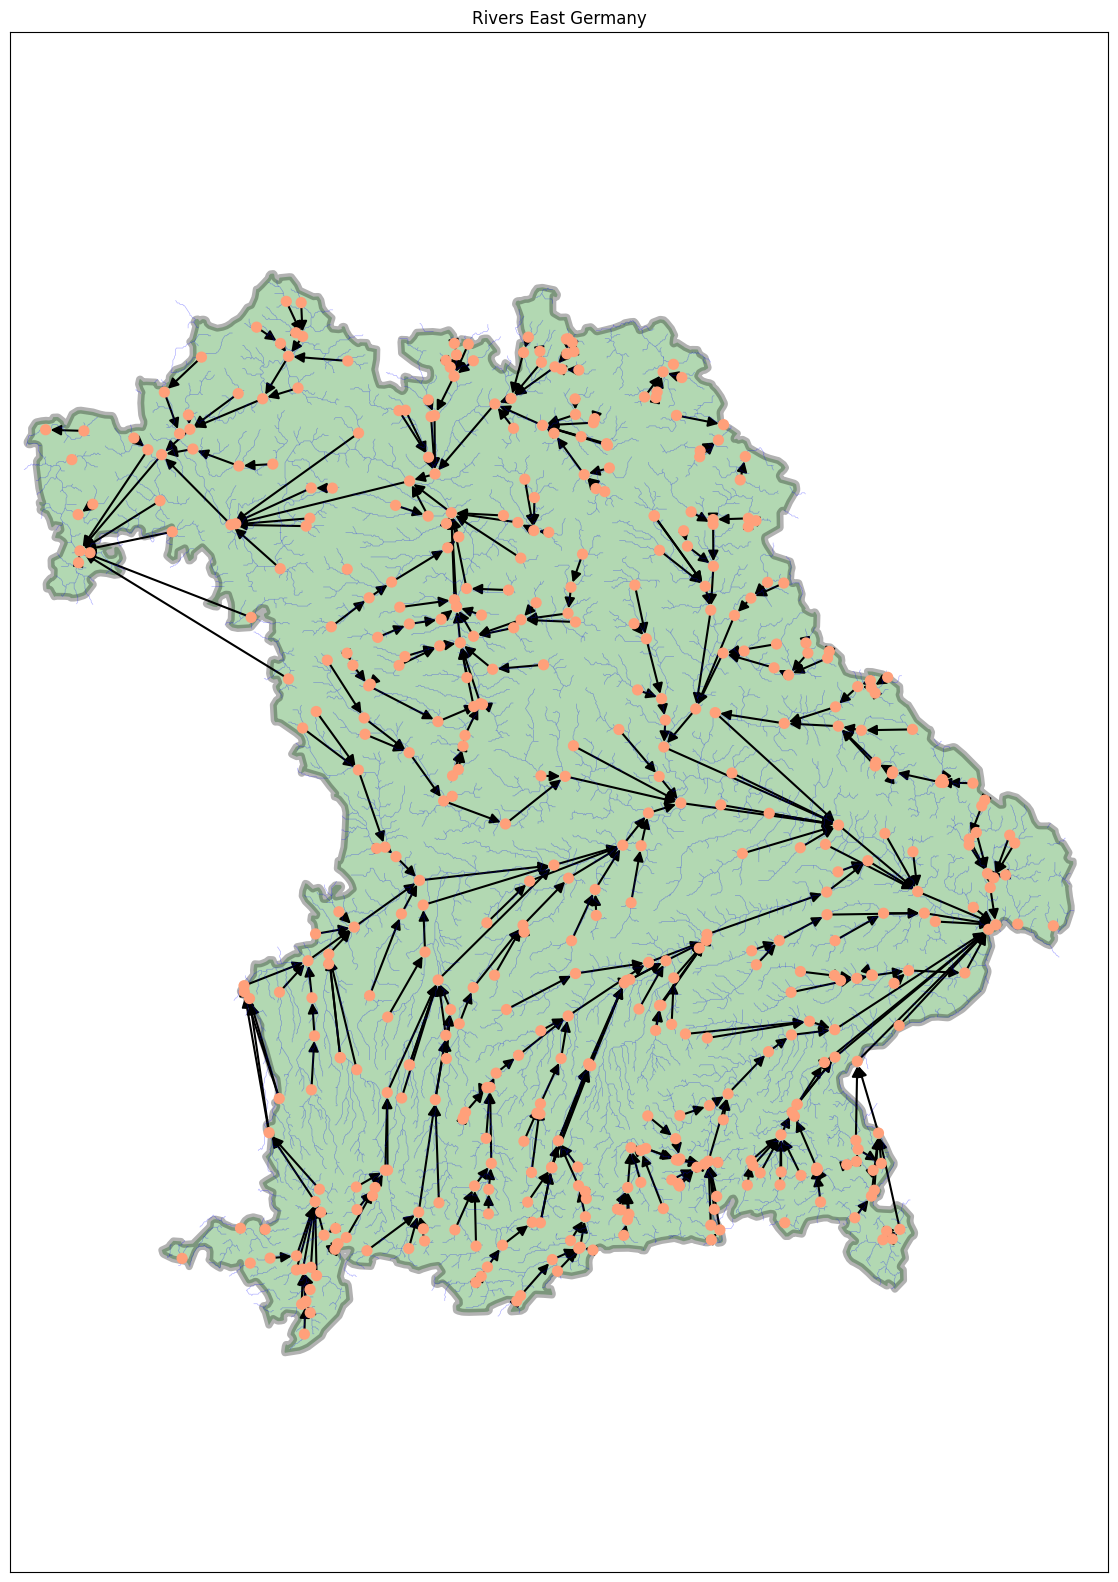

In [7]:
# Full Graph
plot_current_state_of_graph(
    G_tr,
    lim=(46.6, 51.3),
    limx=(8.9, 14.),
    dpi=300,
    node_size=50,
    save=0, # "bavaria"
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15,20),
    hardcode_colors = ["lightsalmon" for _ in range(len(G_tr.nodes))],
    font_size=1,
    ger_path = "../visualization/bavaria_map.shp",
    river_path = "../visualization/river_bavaria_map.shp",
)

## Scoring a sample

In [8]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../" + cfg.sample_path + "random_3" + "/test.p", "rb"))

In [11]:
cmap = mpl.colormaps['viridis']
base_c = cmap(np.linspace(0, 1, 4))

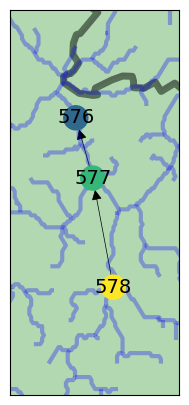

In [10]:
# Single Sample plotting works in the same way.
example = ds[13]
data = load_sample(p= "../" + cfg.data_path, which= example)

plot_current_state_of_graph(
    example,
    dpi=300,
    autozoom=0.15,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=300,
    save=0, #"Special",
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=15.5,
    fs=(5, 5),
    font_size=14,
    ger_path = "../visualization/east_german_map.shp",
    river_path = "../visualization/river_east_german_map.shp",
    hardcode_colors = list(base_c)[1:],
    river_width=3,
    title=None

)

In [12]:
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution="24H",
    interpolate=False,
    normalize=cfg.normalize,
)

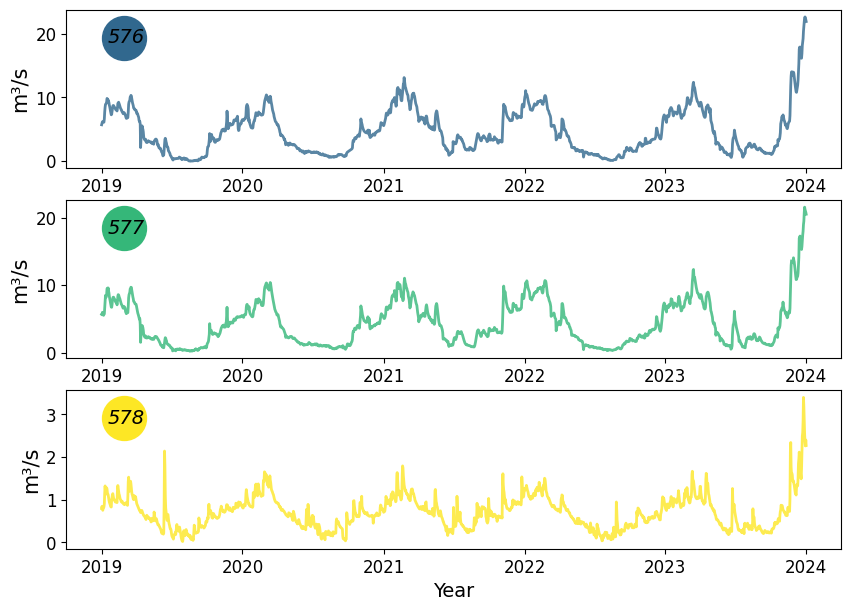

In [13]:
fix, axs = plt.subplots(3, 1, figsize=(10, 7))


for n,x in enumerate(sample_data.columns):#
    axs[n].plot(sample_data[x], linewidth=2, color = base_c[n+1], alpha=0.8)
    axs[n].set_ylabel("m³/s", fontsize=15)
    position = axs[n].get_xbound()[0]+150,sample_data[x].max() - (sample_data[x].max() - sample_data[x].min()) / 7
    axs[n].scatter(position[0], position[1] ,s = 1000, color = base_c[n+1])
    offset = 27 if len(x) == 2 else 44
    axs[n].text(position[0]-offset, position[1], x, verticalalignment="center", fontstyle="italic", fontsize=14)
    axs[n].set_xlabel(None)
    axs[n].tick_params(axis="both", which="major", labelsize=12)
axs[n].set_xlabel("Year", fontsize=14)


plt.savefig("resources/single_sample_plot.png", dpi=300)